# Spaceship Titanic Competition
### By: MaryGrace Kane

### Set-Up

In [14]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Checking which columns have null values & how many

In [15]:
train_data.isnull().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [78]:
test_data.isnull().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
deck             True
cabin_num        True
side             True
dtype: bool

<AxesSubplot:>

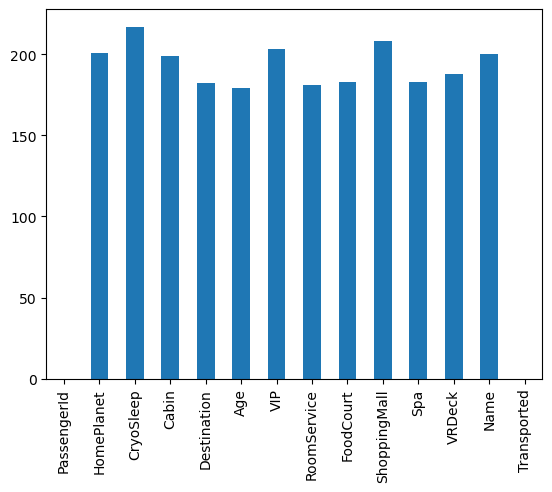

In [79]:
train_data.isnull().sum().plot(kind = 'bar')

In [80]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

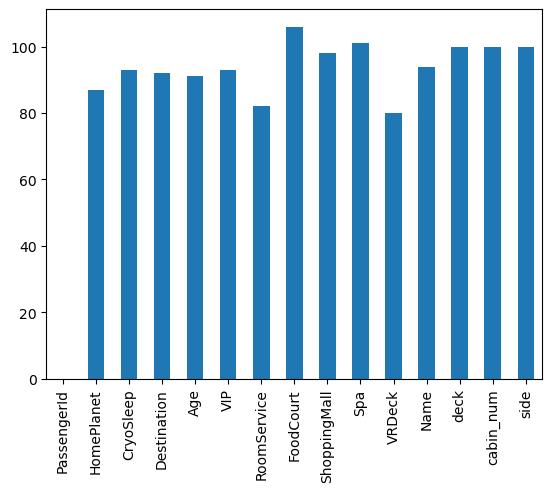

In [81]:
test_data.isnull().sum().plot(kind = 'bar')

In [82]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
deck            100
cabin_num       100
side            100
dtype: int64

### Splitting X & y

In [16]:
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']

### Splitting Cabin Column into 3 Columns

In [17]:
X[['deck', 'cabin_num', 'side']] = X['Cabin'].str.split('/', expand=True)
X.drop('Cabin', axis=1, inplace=True)

In [18]:
test_data[['deck', 'cabin_num', 'side']] = test_data['Cabin'].str.split('/', expand=True)
test_data.drop('Cabin', axis=1, inplace=True)

### Splitting into X_train, y_train, X_valid, y_valid

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 1)

### Separating Numerical & Categorical Columns

In [20]:
cols_missing = [col for col in X_train.columns if X_train[col].isnull().any()]
cols_missing_cat = [col for col in X_train.columns if (X_train[col].dtypes == object) & (col in cols_missing)]
cols_missing_num = [col for col in X_train.columns if (X_train[col].dtypes != object) & (col in cols_missing)]

### Imputing Numerical Columns

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

imputer_X_train = pd.DataFrame(imputer.fit_transform(X_train[cols_missing_num]))
imputer_X_train.columns = cols_missing_num

imputer_X_valid = pd.DataFrame(imputer.transform(X_valid[cols_missing_num]))
imputer_X_valid.columns = cols_missing_num

imputer_X_train.index = X_train.index
imputer_X_valid.index = X_valid.index

### Checking Number of Unique Values per Categorical Column

In [22]:
object_nunique = list(map(lambda col: X_train[col].nunique(), cols_missing_cat))
d = dict(zip(cols_missing_cat, object_nunique))

sorted(d.items(), key=lambda x: x[1])

[('CryoSleep', 2),
 ('VIP', 2),
 ('side', 2),
 ('HomePlanet', 3),
 ('Destination', 3),
 ('deck', 8),
 ('cabin_num', 1714),
 ('Name', 6358)]

### Removing categorical columns that can't be imputed

In [23]:
cols_missing_cat.remove('Name')

In [24]:
cols_missing_cat

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'cabin_num', 'side']

### OneHotEncoding Categorical Columns

In [25]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[cols_missing_cat]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[cols_missing_cat]))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

OH_cols_train.columns = OH_encoder.get_feature_names_out()
OH_cols_valid.columns = OH_encoder.get_feature_names_out()

num_X_train = X_train.drop(cols_missing_cat, axis=1)
num_X_valid = X_valid.drop(cols_missing_cat, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

### Concatenating Imputed & OneHotEncoded Dataframe

In [26]:
OH_X_train.drop(cols_missing_num, axis = 1, inplace = True)

In [27]:
OH_X_train.isnull().any()

PassengerId          False
Name                  True
HomePlanet_Earth     False
HomePlanet_Europa    False
HomePlanet_Mars      False
                     ...  
cabin_num_999        False
cabin_num_nan        False
side_P               False
side_S               False
side_nan             False
Length: 1743, dtype: bool

In [28]:
imputer_X_train.isnull().any()

Age             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
dtype: bool

In [29]:
OH_X_train

,PassengerId,Name,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,CryoSleep_False,CryoSleep_True,CryoSleep_nan,Destination_55 Cancri e,...,cabin_num_993,cabin_num_994,cabin_num_995,cabin_num_997,cabin_num_998,cabin_num_999,cabin_num_nan,side_P,side_S,side_nan
1554,1650_01,Walla Hodes,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5941,6302_06,Branca Simsey,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4194,4473_02,Terek Welte,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7837,8366_03,Jodia Russon,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1232,1308_01,Diram Plegred,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,3130_01,Mall Frasp,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7813,8339_01,Markton Dratembid,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
905,0978_01,Lesley Coxterez,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5192,5538_01,Diedow Gele,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
imputer_X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
1554,28.0,0.000000,0.0,0.000000,0.0,0.000000
5941,12.0,0.000000,0.0,0.000000,0.0,308.308127
4194,27.0,994.000000,0.0,26.000000,1.0,0.000000
7837,2.0,0.000000,0.0,0.000000,0.0,0.000000
1232,40.0,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...
2895,38.0,886.000000,0.0,618.000000,0.0,0.000000
7813,39.0,0.000000,261.0,170.119792,1831.0,1797.000000
905,24.0,229.216969,32.0,8.000000,0.0,0.000000
5192,47.0,0.000000,0.0,0.000000,0.0,0.000000


In [31]:
full_X_train = pd.concat([imputer_X_train, OH_cols_train], axis='columns')
full_X_valid = pd.concat([imputer_X_valid, OH_cols_valid], axis='columns')

### Importing Accuracy Scoring for validation of models

In [38]:
from sklearn.metrics import accuracy_score

### Comparing Models

##### Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(random_state = 1)


dtc_model.fit(full_X_train, y_train)

dtc_val_predictions = dtc_model.predict(full_X_valid)

print("Accuracy:", accuracy_score(dtc_val_predictions, y_valid))

Accuracy: 0.7755289788408464


##### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 1)
rf_model.fit(full_X_train, y_train)

rf_val_predictions = rf_model.predict(full_X_valid)

print("Accuracy:", accuracy_score(rf_val_predictions, y_valid))

Accuracy: 0.797608095676173


##### Outcome: the RandomForestClassifier is more accurate

### Random Forest Playing with Parameters

In [33]:
n_estimators = [100, 200, 500, 1000]
max_depth = [3, 5, 7]

In [34]:
for m in max_depth:
    rf_model = RandomForestClassifier(random_state = 1, max_depth = m)
    rf_model.fit(full_X_train, y_train)

    rf_val_predictions = rf_model.predict(full_X_valid)

    print("max_depth value of:", m, "Accuracy:", accuracy_score(rf_val_predictions, y_valid))

max_depth value of: 3 Accuracy: 0.7378104875804968
max_depth value of: 5 Accuracy: 0.7414903403863845
max_depth value of: 7 Accuracy: 0.7405703771849126


In [35]:
for n in n_estimators:
    rf_model = RandomForestClassifier(random_state = 1, n_estimators = n)
    rf_model.fit(full_X_train, y_train)

    rf_val_predictions = rf_model.predict(full_X_valid)

    print("n_estimator value of:", n, "Accuracy:", accuracy_score(rf_val_predictions, y_valid))

n_estimator value of: 100 Accuracy: 0.797608095676173
n_estimator value of: 200 Accuracy: 0.7985280588776449
n_estimator value of: 500 Accuracy: 0.7999080036798528
n_estimator value of: 1000 Accuracy: 0.8040478380864765


### Repeating Imputation & OneHotEncoding on Full Data

In [41]:
imputer_X = pd.DataFrame(imputer.fit_transform(X[cols_missing_num]))
imputer_X.columns = cols_missing_num

imputer_test = pd.DataFrame(imputer.transform(test_data[cols_missing_num]))
imputer_test.columns = cols_missing_num

imputer_X.index = X.index
imputer_test.index = test_data.index

In [42]:
OH_X = pd.DataFrame(OH_encoder.fit_transform(X[cols_missing_cat]))
OH_test = pd.DataFrame(OH_encoder.transform(test_data[cols_missing_cat]))

OH_X.index = X.index
OH_test.index = test_data.index

OH_X.columns = OH_encoder.get_feature_names_out()
OH_test.columns = OH_encoder.get_feature_names_out()

num_X = X.drop(cols_missing_cat, axis=1)
num_test = test_data.drop(cols_missing_cat, axis=1)

OH_X = pd.concat([num_X, OH_X], axis=1)
OH_test = pd.concat([num_test, OH_test], axis=1)

### Creating New Dataframe with All of the Data

In [43]:
OH_X.drop(cols_missing_num, axis = 1, inplace = True)
OH_test.drop(cols_missing_num, axis = 1, inplace = True)

full_X = pd.concat([imputer_X, OH_X], axis='columns').drop('Name', axis=1)
full_test = pd.concat([imputer_test, OH_test], axis='columns').drop('Name', axis=1)

### Cross Validation to find best parameters for Random Forest Model

In [83]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rfc_parameters = {'n_estimators': [10, 25, 50], 
                  'min_samples_split': [6,7,8], 
                  'max_depth': [3,5,7], 
                  'min_samples_leaf': [2,3,4]
                 }

rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, rfc_parameters, cv=5, scoring='accuracy')
rf_grid.fit(full_X, y)
print('Best Parameters:', rf_grid.best_params_)
print('Best Accuracy:', rf_grid.best_score_)

best_rf_model = rf_grid.best_estimator_
best_rf_model.fit(full_X, y)
preds= best_rf_model.predict(full_test)

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 50}
Best Accuracy: 0.7431287640013737


### Fitting Full Data to Best Model with Best Parameters (manually)

In [45]:
rf_model = RandomForestClassifier(random_state = 1, 
                                  max_depth = 7, 
                                  min_samples_leaf = 4, 
                                  min_samples_split = 7, 
                                  n_estimators = 50
                                 )

rf_model.fit(full_X, y)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=25, random_state=1)

### Refitting Manually to Possibly Improve Results

In [46]:
rf_model = RandomForestClassifier(random_state = 1, 
                                  max_depth = 5, 
                                  n_estimators = 1000
                                 )

rf_model.fit(full_X, y)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

### Outcome: I had the most accurate results when I didn't change the parameters. Below makes them default again:

In [47]:
rf_model = RandomForestClassifier(random_state = 1)

rf_model.fit(full_X, y)

RandomForestClassifier(random_state=1)

### Predicting using test_data

In [48]:
preds = rf_model.predict(full_test).astype('bool')

### Create Output Dataframe

In [49]:
full_X.isnull().values.any()

False

In [84]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': preds})
output.to_csv('submission.csv', index=False)